In [4]:
from sklearn.datasets           import load_digits
from sklearn.ensemble           import BaggingClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import KFold
from sklearn.ensemble           import RandomForestClassifier

import numpy                    as np

digit = load_digits()

X, y = digit.data, digit.target

tree_classifier = DecisionTreeClassifier(random_state=0)
crossvalidation = KFold(n_splits=5, shuffle=True,
                        random_state=1)
bagging = BaggingClassifier(tree_classifier, 
                            max_samples=0.7,
                            max_features=0.7,
                            n_estimators=300)

scores = np.mean(cross_val_score(bagging, X, y,
                                 scoring='accuracy',
                                 cv=crossvalidation))

print('Accuracy: %.3f' % scores)

Accuracy: 0.968


In [5]:
X, y = digit.data, digit.target

crossvalidation = KFold(n_splits=5, shuffle=True,
                        random_state=1)

RF_cls = RandomForestClassifier(n_estimators=300,
                                random_state=1)

score = np.mean(cross_val_score(RF_cls, X, y, 
                                scoring='accuracy',
                                cv=crossvalidation))

print('Accuracy: %.3f' % score)

Accuracy: 0.977


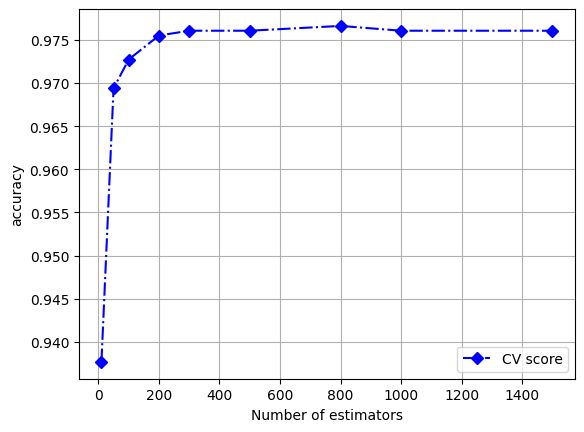

In [17]:
""" O livro indica que o 'n_estimators' pode ser acrescido sem passar a função, descobri que é necessário passar a função param_name

"""
from sklearn.model_selection import validation_curve
param_range = [10, 50, 100, 200, 300, 500, 800, 1000, 1500]
crossvalidation = KFold(n_splits=3, 
                        shuffle=True, 
                        random_state=1)

RF_cls = RandomForestClassifier(n_estimators=300,
                               random_state=0)

train_scores, test_scores = validation_curve(RF_cls, X, y,
                                  param_name='n_estimators', 
                                  param_range=param_range, 
                                  cv=crossvalidation, 
                                  scoring='accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(param_range, mean_test_scores, 
         'bD-.', label='CV score')
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints= 1)
plt.show()

In [13]:
X, y, digit.data, digit.target

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [18]:
from sklearn.ensemble           import AdaBoostClassifier
from sklearn.model_selection    import cross_val_score
from sklearn.model_selection    import KFold

ada = AdaBoostClassifier(n_estimators=1000, 
                         learning_rate=0.01,
                         random_state=1)

crossvalidation = KFold(n_splits=5, shuffle=True,
                        random_state=1)

score = np.mean(cross_val_score(ada, X, y,
                                scoring='accuracy',
                                cv=crossvalidation))
#n_jobs = -1 #usa todos os cores da máquina para uma execução paralelisada. Mas não sei se é assim que se declara.
print('Accuracy: %.3f' % score)

Accuracy: 0.754
